In [1]:
!pip install tensorflow-gpu 
import tensorflow as tf
import keras

In [2]:
import tensorflow as tf
import keras

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
tf.__version__

'2.5.0'

In [5]:
import struct, os

In [11]:
def load_mnist(path, kind="train"): # load_mnist라는 함수 생성 / 파일을 4개 읽을 것이므로 경로와 kind의 변수로 train으로 설정
    labels_path = os.path.join(path, "%s-labels-idx1-ubyte"%kind) #label file
    images_path = os.path.join(path, "%s-images-idx3-ubyte"%kind) #image file / idx3 : 3차원
    # label에 관련된 처리
    with open(labels_path,"rb") as la_path:
        magic,n = struct.unpack(">II", la_path.read(8)) # 두개를 읽어올 것임 / la_path.read(8) : 8바이트로 읽음
        labels = np.fromfile(la_path,dtype=np.uint8) #test용 label을 읽을 수 있고 train용 label을 읽을 수도 있음
    # image에 관련된 처리
    with open(images_path, "rb") as img_path:
        magic, num, rows, cols = struct.unpack(">IIII",img_path.read(16))
        images = np.fromfile(img_path,dtype=np.uint8).reshape(len(labels),28**2)
        images = ((images/255)-0.5)*2 #나눠서 0에서 1사이로 바꿔준다 / -0.5 : -0.5에서 0.5사이 / *2를 함으로써 -1과 1사이를 수행하도록 해서 표준화(standard scaling)
    # 두개의 처리가 모두 끝나면 return
    return images, labels


In [14]:
X_train, y_train = load_mnist("IMAGE_~1/",kind="train") #주피터와 파일이 같은 경로에 있어야 함
X_test, y_test = load_mnist("IMAGE_~1/",kind="t10k")
X_valid, y_valid = X_train[50000:,:], y_train[50000:]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_valid.shape[0],X_valid.shape[1]) #valid, train 재조정
print(X_train.shape[0],X_train.shape[1]) #X_train이 총 60,000개 
print(X_test.shape[0],X_test.shape[1])

10000 784
50000 784
10000 784


In [15]:
mean_vals = np.mean(X_train,axis=0) # 다시 정규화
std_val = np.std(X_train)
X_train_centered = (X_train-mean_vals)/std_val #표준화
X_test_centered = (X_test-mean_vals)/std_val
X_valid_centered = (X_valid-mean_vals)/std_val

In [16]:
y_train_onehot = tf.keras.utils.to_categorical(y_train) #범주형으로 10000,01000,00100 이렇게 바꿈
y_train_onehot[:3]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
model = tf.keras.models.Sequential() #Sequential정보를 만들어놓고 add함


In [18]:
#layer가 3개니까 model도 3개
model.add(tf.keras.layers.Dense(units = 50, #Denser는 일반적인 layer
                                input_dim = X_train_centered.shape[1],
                                kernel_initializer = 'glorot_uniform', #'glorot_uniform' : 균일하게 나갈 것 
                                bias_initializer = 'zeros',
                                activation = 'tanh')) #'tanh' : 다음에 어떻게 보낼지는 layer에게 줘라
model.add(tf.keras.layers.Dense(units = 50, 
                                input_dim = 50, #784개의 입력을 받고 출력이 50개라 50개로 연결하므로 50이라 적어줌 (50보다 적어도 됌)
                                kernel_initializer = 'glorot_uniform',
                                bias_initializer = 'zeros',
                                activation = 'tanh'))
model.add(tf.keras.layers.Dense(units = 10, #출력에 맞게끔 줄임(답과 연결시켜야 하므로) 
                                input_dim = 50, # 이전 layer이 50개로 들어옴
                                kernel_initializer = 'glorot_uniform',
                                bias_initializer = 'zeros',
                                activation = 'softmax')) #근사값을 들어 %를 사용해 확률적으로 답을 줌


In [19]:
model.summary() #tensorflow한 뒤 summary하면 편함

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [20]:
# optimizer - 계수값 바꿔주는 역할
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.0001, decay=1e-7, momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss="categorical_crossentropy")

C:\Users\CPB06GameN\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [21]:
model.fit(X_train_centered, y_train_onehot, batch_size=64, epochs =50, verbose=1, validation_split=0.1)
# batch_size=64 - 64개 이미지씩 처리

Epoch 1/50
704/704 [==============================] - 1s 933us/step - loss: 1.6890 - val_loss: 1.2680
Epoch 2/50
704/704 [==============================] - 1s 745us/step - loss: 1.0560 - val_loss: 0.9554
Epoch 3/50
704/704 [==============================] - 1s 734us/step - loss: 0.8360 - val_loss: 0.7969
Epoch 4/50
704/704 [==============================] - 1s 735us/step - loss: 0.7123 - val_loss: 0.6986
Epoch 5/50
704/704 [==============================] - 1s 779us/step - loss: 0.6316 - val_loss: 0.6317
Epoch 6/50
704/704 [==============================] - 1s 875us/step - loss: 0.5745 - val_loss: 0.5829
Epoch 7/50
704/704 [==============================] - 1s 994us/step - loss: 0.5318 - val_loss: 0.5459
Epoch 8/50
704/704 [==============================] - 1s 911us/step - loss: 0.4985 - val_loss: 0.5166
Epoch 9/50
704/704 [==============================] - 1s 889us/step - loss: 0.4716 - val_loss: 0.4927
Epoch 10/50
704/704 [==============================] - 1s 971us/step - loss: 0.449

In [22]:
y_train_pred = model.predict_classes(X_train_centered, verbose=0)
y_train_pred[:3]

C:\Users\CPB06GameN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 0, 4], dtype=int64)

In [23]:
total_predicts = np.sum(y_train==y_train_pred, axis=0)
print(total_predicts)
train_res = total_predicts/y_train.shape[0]
print(train_res)

46733
0.93466


In [24]:
y_test_pred = model.predict_classes(X_test_centered, verbose=0)
y_test_pred[:3]

array([7, 2, 1], dtype=int64)

In [25]:
total_predicts = np.sum(y_test==y_test_pred, axis=0)
print(total_predicts)
test_res = total_predicts/y_test.shape[0]
print(test_res)

9330
0.933


In [26]:
n =0
for i,y in enumerate(y_test):
    if y!=y_test_pred[i]:
        print(i,y,y_test_pred[i])
        n+=1
print(n)

8 5 6
33 4 6
63 3 2
66 6 2
92 9 4
124 7 4
149 2 9
193 9 4
195 3 5
233 8 7
241 9 8
245 3 6
259 6 0
290 8 4
300 4 6
313 3 5
320 9 7
321 2 7
324 0 9
340 5 3
341 6 4
352 5 0
358 7 9
380 0 5
381 3 7
389 9 7
403 8 5
412 5 3
444 2 8
445 6 0
448 9 8
449 3 5
464 3 7
478 5 8
479 9 3
495 8 6
502 5 3
507 3 5
530 9 4
531 3 6
542 8 4
543 8 3
550 7 9
551 7 1
565 4 9
569 3 5
578 3 2
582 8 2
591 8 3
613 2 8
619 1 8
628 3 9
658 7 4
659 2 9
684 7 3
691 8 4
707 4 9
717 0 6
720 5 8
738 2 8
740 4 9
760 4 9
781 8 5
791 5 9
800 8 5
810 7 2
839 8 3
844 8 5
857 5 3
881 4 9
896 0 2
898 7 2
924 2 7
938 3 5
939 2 0
947 8 9
950 7 2
956 1 6
965 6 0
969 4 5
982 3 8
1003 5 3
1014 6 5
1032 5 8
1039 7 9
1044 6 8
1050 2 6
1062 3 7
1068 8 4
1082 5 3
1096 7 0
1101 8 3
1107 9 3
1112 4 6
1114 3 8
1128 3 7
1181 6 1
1182 6 8
1191 0 6
1192 9 4
1194 7 9
1198 8 4
1200 8 0
1202 8 5
1204 3 8
1206 7 2
1208 3 9
1226 7 2
1228 9 3
1232 9 4
1234 8 5
1242 4 9
1243 5 6
1247 9 0
1256 2 3
1260 7 1
1270 4 9
1283 7 2
1299 5 7
1315 3 5
1319 8 

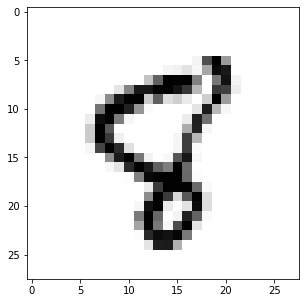

In [27]:
plt.figure(figsize=(5,5))
image = np.reshape(X_test[403],[28,28])
plt.imshow(image, cmap="Greys")
plt.show()

In [28]:
# CNN(Convolutional Neural Network)
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))  # 불필요한 정보 줄임
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)             

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])

In [30]:
history = model.fit(X_train_centered, y_train_onehot, batch_size=64, epochs=20, validation_data=(X_valid_centered, y_valid_onehot))

NameError: name 'y_valid_onehot' is not defined

In [31]:
plt.plot(np.array(1,21), history.history['loss'],label='loss')
plt.plot(np.array(1,21), history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

TypeError: Cannot interpret '21' as a data type

In [32]:
np.argmax(model.predict(X_test_centered[:10]),axis=1)
# [7 2 1 0 4 1 4 9 5 9]

ValueError: in user code:

    C:\Users\CPB06GameN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1569 predict_function  *
        return step_function(self, iterator)
    C:\Users\CPB06GameN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\CPB06GameN\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\CPB06GameN\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\CPB06GameN\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\CPB06GameN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1552 run_step  **
        outputs = model.predict_step(data)
    C:\Users\CPB06GameN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1525 predict_step
        return self(x, training=False)
    C:\Users\CPB06GameN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\CPB06GameN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:230 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (None, 784)


In [ ]:
print(y_test[:10])
# [7 2 1 0 4 1 4 9 5 9]